In [1]:
import numpy as np
import gensim.downloader as api
import gensim.models
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
# Corpus en español (10 frases)
corpus = [
    "El gato juega en el jardín",
    "Los perros corren en el parque",
    "Las flores son hermosas",
    "El sol brilla en la mañana",
    "Me gusta leer libros de historia",
    "El café caliente es delicioso",
    "Las montañas son altas y hermosas",
    "A los niños les encanta jugar con sus amigos",
    "Las películas de ciencia ficción son interesantes",
    "El río fluye con fuerza en invierno"
]

In [3]:
# Tokenización simple
tokenized_corpus = [sentence.lower().split() for sentence in corpus]


In [4]:
# Entrenamiento de modelos Word2Vec y FastText
w2v_model = gensim.models.Word2Vec(sentences=tokenized_corpus, vector_size=50, window=5, min_count=1, workers=4)
fasttext_model = gensim.models.FastText(sentences=tokenized_corpus, vector_size=50, window=5, min_count=1, workers=4)

In [5]:
# Carga de modelo GloVe preentrenado (evitamos problemas de instalación)
print("Descargando modelo GloVe preentrenado...")
glove_model = api.load("glove-wiki-gigaword-50")
print("Modelo GloVe cargado correctamente.")

Descargando modelo GloVe preentrenado...
[==================================================] 100.0% 66.0/66.0MB downloaded
Modelo GloVe cargado correctamente.


In [6]:
# Visualización de embeddings
words = list(w2v_model.wv.key_to_index.keys())[:10]  # Tomamos algunas palabras
vectors = np.array([w2v_model.wv[word] for word in words])

In [7]:
# Reducimos dimensión con PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)


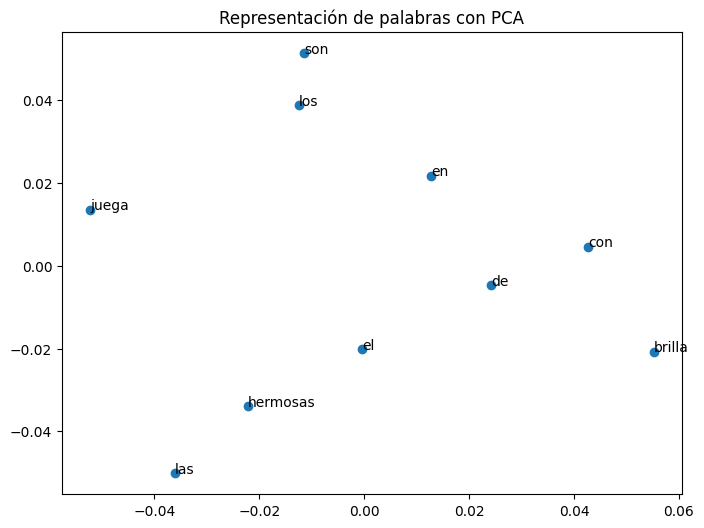

In [8]:
# Gráfica de embeddings
plt.figure(figsize=(8, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], marker='o')
for i, word in enumerate(words):
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))
plt.title("Representación de palabras con PCA")
plt.show()

In [9]:
# Predicción de palabras similares
word = "gato"
print("Palabras similares a 'gato':")
print("Word2Vec:", w2v_model.wv.most_similar(word, topn=3))
print("FastText:", fasttext_model.wv.most_similar(word, topn=3))
print("GloVe:", glove_model.most_similar(word, topn=3))

Palabras similares a 'gato':
Word2Vec: [('amigos', 0.3173588812351227), ('niños', 0.23984278738498688), ('altas', 0.21452398598194122)]
FastText: [('sus', 0.2546130418777466), ('amigos', 0.21754221618175507), ('altas', 0.21627897024154663)]
GloVe: [('lukamba', 0.8060766458511353), ('gon', 0.7140658497810364), ('sono', 0.6904968619346619)]
